# GroupBy: Split, Apply, Combine
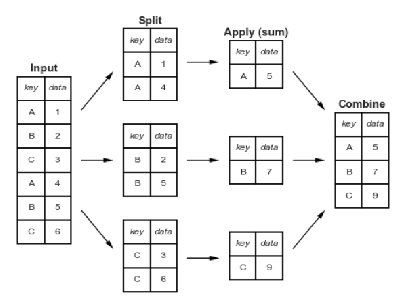

In [ ]:
'''

Any groupby operation involves one of the following operations on the original object. 
    - Splitting the Object
    - Applying a function
    - Combining the results
    
In many situations, we split the data into sets and we apply some functionality on each subset. 
In the apply functionality, we can perform the following operations −

    Aggregation − computing a summary statistic

    Transformation − perform some group-specific operation

    Filtration − discarding the data with some condition


In [ ]:

'''
- Split Data into Groups
    df.groupby('key')   # Single Column
    df.groupby(['key1','key2'])  # Multiple Column
    df.groupby(key,axis=1)   # Single Column based on Axis
    
- View Groups
   df.groupby('Team').groups
   
- Group by with multiple columns
   df.groupby(['Team','Year']).groups
   
- Grouping by multiple categories
    # Creating a subset
    df_subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]
    
    # Group by multiple categories
    df_subset.groupby(['Sex', 'Pclass']).mean()

   
- Iterating through Groups
   grouped = df.groupby('Year')
   for name,group in grouped:
     print(name)
     print(group)
     
- Select a Group
   grouped = df.groupby('Year')
   print(grouped.get_group(2014))
   
- Applying functions to GroupBy Groups:
  - Aggregation
  - Transofrmation
  - Filteration
  - Applying our own function
   
- Aggregation:

    agg() and it allows us to specify multiple aggregation functions at once
    
    df.groupby('Sex').Age.max()
    
    df.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean'])

    # Mean
    grouped = df.groupby('Year')
    print(grouped['Points'].agg(np.mean))
    
    grouped = df.groupby('Team')
    print grouped.agg(np.size)
    
    # Applying Multiple Aggregation Functions at Once
    grouped = df.groupby('Team')
    print grouped['Points'].agg([np.sum, np.mean, np.std])
    
    df.groupby('Sex').Age.agg(['max', 'mean', lambda x: True if x.mean() > 50 else False])
    
    def categorize(x):
      m = x.mean()
      return True if m > 29 else False
      
    df.groupby('Sex').Age.agg(['max', 'mean', categorize])
    
    
    #custom column name
    df.groupby('Sex').Age.agg(sex_max=('max'),sex_min=('min'),)
    
    
- Transformations

    standardization = lambda x: (x - x.mean()) / x.std()
    #01
    df.groupby('Sex').Age.transform(standardization) or 
    df.groupby('Sex').Age.apply(standardization)
    
    #02
    grouped = df.groupby('Team')
    score = lambda x: (x - x.mean()) / x.std()*10
    print(grouped.transform(score))
    

- Filtration

   # Apply Filter on the Grouped data
   df.groupby('Cabin').filter(lambda x: len(x) >= 4)
   
- Lambda Expression

    # Without column
    df.groupby('Sex').mean()

    df.groupby('Sex').agg(['mean', 'median'])
    
- Resetting index with as_index
    - df_groupby_multi = subset.groupby(['Sex', 'Pclass']).mean()
      
      # Resetting index
      df_groupby_multi.reset_index()


In [136]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic_train.csv");

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [137]:
df.groupby('Sex').ngroups

2

In [138]:


df.groupby('Sex').groups

{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}

In [139]:
# size() method to compute and display group sizes.
df.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

In [140]:
# first() or last() to preview the result with the first or last entry.

In [141]:
# Let's print the first entries in all the groups formed.

df.groupby('Embarked').first()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
Q,6,0,3,"Moran, Mr. James",male,2.0,0,0,330877,8.4583,C78
S,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C123


In [142]:
# Let's print the last entries in all the groups formed.
df.groupby('Embarked').last()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148
Q,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,F38
S,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.45,B42


In [143]:
# get_group() method to retrieve one of the created groups

df_female = df.groupby('Sex').get_group('female')
df_female.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# Finding the values contained in the "S" group

gk = df.groupby('Embarked')

gk.get_group('S').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [18]:
# First grouping based on "Embarked" within each team we are grouping based on 'Sex'

gkk = df.groupby(['Embarked', 'Sex'])

gkk.first()

PassengerId  Survived  Pclass  \
Embarked Sex                                     
C        female            2         1       1   
         male             27         0       3   
Q        female           23         1       3   
         male              6         0       3   
S        female            3         1       3   
         male              1         0       3   

                                                              Name   Age  \
Embarked Sex                                                               
C        female  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
         male                              Emir, Mr. Farred Chehab  40.0   
Q        female                        McGowan, Miss. Anna "Annie"  15.0   
         male                                     Moran, Mr. James   2.0   
S        female                             Heikkinen, Miss. Laina  26.0   
         male                              Braund, Mr. Owen Harris  22.0   

                 SibSp  Parch            Ticket     Fare Cabin  
Embarked Sex                                                    
C        female      1      0          PC 17599  71.2833   C85  
         male        0      0              2631   7.2250   B30  
Q        female      0      0            330923   8.0292  E101  
         male        0      0            330877   8.4583   C78  
S        female      0      0  STON/O2. 3101282   7.9250  C123  
         male        1      0         A/5 21171   7.2500   E46

In [21]:
df.groupby('Embarked').groups

{'C': [1, 9, 19, 26, 30, 31, 34, 36, 39, 42, 43, 48, 52, 54, 57, 60, 64, 65, 73, 96, 97, 111, 114, 118, 122, 125, 128, 130, 135, 139, 140, 155, 174, 177, 181, 194, 195, 203, 207, 209, 215, 218, 240, 244, 255, 256, 258, 273, 285, 291, 292, 295, 296, 299, 306, 307, 308, 309, 310, 311, 319, 325, 329, 337, 352, 354, 361, 362, 366, 367, 369, 370, 373, 375, 377, 378, 380, 381, 389, 393, 420, 448, 452, 453, 455, 469, 473, 484, 487, 493, 495, 496, 505, 513, 522, 523, 524, 531, 532, 533, ...], 'Q': [5, 16, 22, 28, 32, 44, 46, 47, 82, 109, 116, 126, 143, 156, 171, 186, 188, 196, 198, 208, 214, 241, 245, 260, 264, 274, 278, 280, 289, 300, 301, 303, 322, 330, 358, 359, 364, 368, 388, 411, 412, 421, 428, 459, 468, 501, 502, 510, 517, 525, 552, 560, 573, 593, 612, 613, 626, 629, 653, 654, 657, 680, 697, 703, 718, 727, 749, 767, 768, 776, 778, 787, 790, 825, 828, 885, 890], 'S': [0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 23, 24, 25, 27, 29, 33, 35, 37, 38, 40, 41, 45, 49, 50, 51, 5

In [22]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
                    'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
             'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
             'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [23]:
df.groupby('Team').groups

{'Devils': [2, 3], 'Kings': [4, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10], 'kings': [5]}

In [24]:
# Group by with multiple columns

df.groupby(['Team','Year']).groups

{('Devils', 2014): [2], ('Devils', 2015): [3], ('Kings', 2014): [4], ('Kings', 2016): [6], ('Kings', 2017): [7], ('Riders', 2014): [0], ('Riders', 2015): [1], ('Riders', 2016): [8], ('Riders', 2017): [11], ('Royals', 2014): [9], ('Royals', 2015): [10], ('kings', 2015): [5]}

In [25]:
# Loop over GroupBy Groups

grouped = df.groupby('Year')

for name,group in grouped:
    print(name)
    print(group)

2014
     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701
2015
      Team  Rank  Year  Points
1   Riders     2  2015     789
3   Devils     3  2015     673
5    kings     4  2015     812
10  Royals     1  2015     804
2016
     Team  Rank  Year  Points
6   Kings     1  2016     756
8  Riders     2  2016     694
2017
      Team  Rank  Year  Points
7    Kings     1  2017     788
11  Riders     2  2017     690


In [26]:
grouped = df.groupby('Year')

print(grouped.get_group(2014))

     Team  Rank  Year  Points
0  Riders     1  2014     876
2  Devils     2  2014     863
4   Kings     3  2014     741
9  Royals     4  2014     701


In [41]:
df = pd.read_csv("Titanic_train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df.groupby('Embarked')['Sex'].count()

Embarked
C    168
Q     77
S    644
Name: Sex, dtype: int64

In [37]:
# Survived Count based on the Sex(male and Female) in the different 'Embarked'

df.groupby(['Embarked','Sex'])['Survived'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: Survived, dtype: int64

In [38]:
df.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [41]:
df = pd.read_csv("train_bigmart_1.csv");

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [43]:
df.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [44]:
# Group by 'Outlet_Location_Type'

df.groupby('Outlet_Location_Type').count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
Outlet_Location_Type,,,,,,,,,,,
Tier 1,2388,1860,2388,2388,2388,2388,2388,2388,2388,2388,2388
Tier 2,2785,2785,2785,2785,2785,2785,2785,2785,930,2785,2785
Tier 3,3350,2415,3350,3350,3350,3350,3350,3350,2795,3350,3350


In [45]:
df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

Outlet_Location_Type
Tier 1    4.482059e+06
Tier 2    6.472314e+06
Tier 3    7.636753e+06
Name: Item_Outlet_Sales, dtype: float64

In [46]:
# Loop over GroupBy Groups

obj = df.groupby('Outlet_Location_Type')

for name,group in obj:
    print(name,'contains',group.shape[0],'rows')

Tier 1 contains 2388 rows
Tier 2 contains 2785 rows
Tier 3 contains 3350 rows


In [47]:
df.groupby(['Outlet_Location_Type']).groups.keys()

dict_keys(['Tier 1', 'Tier 2', 'Tier 3'])

## Aggrgation

In [73]:
import pandas as pd
df = pd.read_csv("Titanic_train.csv");

In [19]:
# Find the Average 'Age' based on 'Sex'
df.groupby('Sex').Age.mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [149]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [6]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [7]:
df.groupby('Embarked').Age.mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

In [8]:
df.groupby(['Embarked','Sex']).Age.mean().rename_axis(["Embarked", "Sex"])

Embarked  Sex   
C         female    28.344262
          male      32.998841
Q         female    24.291667
          male      30.937500
S         female    27.771505
          male      30.291440
Name: Age, dtype: float64

In [9]:
df.groupby(['Embarked','Sex']).Age.agg(["mean","median","min","max"])

mean  median    min   max
Embarked Sex                                   
C        female  28.344262    24.0   0.75  60.0
         male    32.998841    30.0   0.42  71.0
Q        female  24.291667    21.5  15.00  39.0
         male    30.937500    30.0   2.00  70.5
S        female  27.771505    27.0   1.00  63.0
         male    30.291440    28.0   0.67  80.0

In [20]:
df.groupby('Survived').agg({})

""


In [77]:
# custom aggregation function:

def categorize(x):
    m = x.mean()
    return True if m > 29 else False

df.groupby('Sex').Age.agg(['max', 'mean', categorize])

,max,mean,categorize
Sex,,,
female,63.0,27.915709,False
male,80.0,30.726645,True


In [78]:
# lambda expression
df.groupby('Sex').Age.agg(['max', 'mean', lambda x: True if x.mean() > 50 else False])

,max,mean,<lambda_0>
Sex,,,
female,63.0,27.915709,False
male,80.0,30.726645,False


In [79]:
# Without column
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [80]:
df.groupby('Sex').agg(['mean', 'median'])

PassengerId         Survived           Pclass               Age         \
              mean median      mean median      mean median       mean median   
Sex                                                                             
female  431.028662  414.5  0.742038      1  2.159236      2  27.915709   27.0   
male    454.147314  464.0  0.188908      0  2.389948      3  30.726645   29.0   

           SibSp            Parch              Fare         
            mean median      mean median       mean median  
Sex                                                         
female  0.694268      0  0.649682      0  44.479818   23.0  
male    0.429809      0  0.235702      0  25.523893   10.5

In [70]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
                    'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
             'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
             'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [71]:
df.groupby('Rank').Points.max()

Rank
1    876
2    863
3    741
4    812
Name: Points, dtype: int64

In [72]:
df.groupby('Rank').Points.min()

Rank
1    756
2    690
3    673
4    701
Name: Points, dtype: int64

In [14]:
# Aggregation
import numpy as np

grouped = df.groupby('Team')

grouped['Points'].agg(np.mean)

Team
Devils    768.000000
Kings     761.666667
Riders    762.250000
Royals    752.500000
kings     812.000000
Name: Points, dtype: float64

In [16]:
# Applying Multiple Aggregation Functions at Once

grouped = df.groupby('Team')
grouped['Points'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Team,,,
Devils,1536,768.000000,134.350288
Kings,2285,761.666667,24.006943
Riders,3049,762.250000,88.567771
Royals,1505,752.500000,72.831998
kings,812,812.000000,NaN


In [39]:
grouped = df.groupby('Team')
print(grouped.agg(np.size))

        Rank  Year  Points
Team                      
Devils     2     2       2
Kings      3     3       3
Riders     4     4       4
Royals     2     2       2
kings      1     1       1


## Transformation

In [43]:
df = pd.read_csv("train_bigmart_1.csv");

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [45]:
df['Item_Weight'] = df.groupby(['Item_Fat_Content','Item_Type'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
import pandas as pd
df = pd.read_csv("Titanic_train.csv");

standardization = lambda x: (x - x.mean()) / x.std()

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: Age, Length: 891, dtype: float64

In [84]:
# standardization on Age column with transform()
df.groupby('Sex').Age.transform(standardization)

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: Age, Length: 891, dtype: float64

In [83]:
# standardization on Age column using apply()
df.groupby('Sex').Age.apply(standardization)

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: Age, Length: 891, dtype: float64

## Filteration

In [46]:
def filter_func(x):
    return x['Item_Weight'].std() < 3

df_filter = df.groupby(['Item_Weight']).filter(filter_func)
df_filter.shape

(8510, 12)

In [47]:
df_apply = df.groupby(['Outlet_Establishment_Year'])['Item_MRP'].apply(lambda x: x - x.mean())
df_apply

0       109.511501
1       -93.409434
2         1.320301
3        41.317406
4       -87.564582
           ...    
8518     73.095818
8519    -32.793246
8520    -58.000081
8521    -38.545434
8522    -66.590387
Name: Item_MRP, Length: 8523, dtype: float64

In [21]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
                    'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
            'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
             'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
             'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [23]:
# Filtration by applying lambda Function

df.groupby('Team').filter(lambda x: len(x) >= 3)

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
4,Kings,3,2014,741
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
11,Riders,2,2017,690


In [90]:
## Resetting index with as_index

df_subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]

In [91]:
df_groupby_multi = df_subset.groupby(['Sex', 'Pclass']).mean()

df_groupby_multi

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

In [92]:
# Resetting index
df_groupby_multi.reset_index()

,Sex,Pclass,Age,Fare
0,female,1,34.611765,106.125798
1,female,2,28.722973,21.970121
2,female,3,21.750000,16.118810
3,male,1,41.281386,67.226127
4,male,2,30.740707,19.741782
5,male,3,26.507589,12.661633


In [154]:
technologies   = ({
                    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python"],
                    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000],
                    'Duration':['30days','50days','55days','40days','60days','35days','55days','50days'],
                    'Discount':[1000,2300,1000,1200,2500,1300,1400,1600]
                })
df2 = pd.DataFrame(technologies, columns=['Courses','Fee','Duration','Discount'])
print(df)

   Courses    Fee Duration  Discount
0    Spark  22000   30days      1000
1  PySpark  25000   50days      2300
2   Hadoop  23000   55days      1000
3   Python  24000   40days      1200
4   Pandas  26000   60days      2500
5   Hadoop  25000   35days      1300
6    Spark  25000   55days      1400
7   Python  22000   50days      1600


In [ ]:
# Use GroupBy() to compute the sum
df2 = df.groupby('Courses').sum()
print(df2)

# Use GroupBy() & compute sum on specific column
df.groupby('Courses')['Fee'].sum()

# Using GroupBy multiple column
df.groupby(['Courses','Duration'])['Fee'].sum()

# Groupby and get sum() and count()
df.groupby('Courses')['Fee'].agg(['sum','count'])

# Pandas groupby get sum() and count()
df.groupby('Courses').agg({'Fee': ['sum','count']})

# Remove sorting on grouped results
df.groupby(by=['Courses'], sort=False).sum()

# Sorting group keys on descending order
groupedDF = df.groupby('Courses',sort=False).sum()
sortedDF=groupedDF.sort_values('Courses', ascending=False)

# Using as_index=False
df.groupby('Courses', as_index =False)['Fee'].sum()

# Using reset_index()
df.groupby(['Courses'])['Fee'].sum().reset_index()

# GroupBy multiple columns using agg()
df.groupby(['Courses','Duration'])['Discount'].agg("sum")

# GroupBy multiple columns using transform()
df.groupby(['Courses', 'Fee'])['Discount'].transform('sum')

# GroupBy multiple columns using pivot function
 df.groupby(['Courses','Duration'],as_index = False).sum().pivot('Courses','Duration').fillna(0)

# DataFrame.set_index using sum with level
df.set_index(['Courses','Duration']).sum(level=[0,1])

In [96]:
import pandas as pd
import dateutil

# Load data from csv file
data = pd.read_csv('phone_data.csv')

data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [98]:
# How many rows the dataset
data['item'].count()

830

In [99]:
# What was the longest phone call / data entry?
data['duration'].max()

10528.0

In [100]:
# How many seconds of phone calls are recorded in total?
data['duration'][data['item'] == 'call'].sum()

92321.0

In [101]:
# How many entries are there for each month?
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [102]:
# Number of non-null unique network entries
data['network'].nunique()

9

In [103]:
data.groupby(['month']).groups.keys()

dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [104]:
len(data.groupby(['month']).groups['2014-11'])

230

In [105]:
# Get the first entry for each month
data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,15/10/14 06:58,34.429,data,data,data
2014-12,228,13/11/14 06:58,34.429,data,data,data
2015-01,381,13/12/14 06:58,34.429,data,data,data
2015-02,577,13/01/15 06:58,34.429,data,data,data
2015-03,729,12/02/15 20:15,69.000,call,landline,landline


In [106]:
# Get the sum of the durations per month
data.groupby('month')['duration'].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [107]:
# Get the number of dates / entries in each month
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [108]:
# What is the sum of durations, for calls only, to each network
data[data['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [109]:
# How many calls, sms, and data entries are in each month?
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [110]:
# How many calls, texts, and data are sent per month, split by network_type?
data.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

In [112]:
# produces Pandas Series
data.groupby('month')['duration'].sum() 

# Produces Pandas DataFrame
data.groupby('month')[['duration']].sum()

,duration
month,
2014-11,26639.441
2014-12,14641.870
2015-01,18223.299
2015-02,15522.299
2015-03,22750.441


In [113]:
data.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [ ]:
# Multiple Statistics per Group

In [114]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(['month', 'item']).agg({
          'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type            date
month   item                                         
2014-11 call  25547.000           107  15/10/14 06:58
        data    998.441            29  15/10/14 06:58
        sms      94.000            94  16/10/14 22:18
2014-12 call  13561.000            79  14/11/14 17:24
        data   1032.870            30  13/11/14 06:58
        sms      48.000            48  14/11/14 17:28
2015-01 call  17070.000            88  15/12/14 20:03
        data   1067.299            31  13/12/14 06:58
        sms      86.000            86  15/12/14 19:56
2015-02 call  14416.000            67  15/01/15 10:36
        data   1067.299            31  13/01/15 06:58
        sms      39.000            39  15/01/15 12:23
2015-03 call  21727.000            47  12/02/15 20:15
        data    998.441            29  13/02/15 06:58
        sms      25.000            25  19/02/15 18:46

In [117]:
data

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


In [ ]:
'''
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'duration':'sum',
    'date': lambda x: max(x) - 1
}

data.groupby('month').duration.agg(aggregations)

In [121]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type            date  \
                  min        max        sum        count             min   
month   item                                                               
2014-11 call    1.000   1940.000  25547.000          107  01/11/14 15:13   
        data   34.429     34.429    998.441           29  01/11/14 06:58   
        sms     1.000      1.000     94.000           94  03/11/14 08:40   
2014-12 call    2.000   2120.000  13561.000           79  02/12/14 11:40   
        data   34.429     34.429   1032.870           30  01/12/14 06:58   
        sms     1.000      1.000     48.000           48  01/12/14 12:51   
2015-01 call    2.000   1859.000  17070.000           88  02/01/15 11:27   
        data   34.429     34.429   1067.299           31  01/01/15 06:58   
        sms     1.000      1.000     86.000           86  02/01/15 23:26   
2015-02 call    1.000   1863.000  14416.000           67  01/02/15 13:33   
        data   34.429     34.429   1067.299           31  01/02/15 06:58   
        sms     1.000      1.000     39.000           39  02/02/15 17:35   
2015-03 call    2.000  10528.000  21727.000           47  01/03/15 12:19   
        data   34.429     34.429    998.441           29  01/03/15 06:58   
        sms     1.000      1.000     25.000           25  02/03/15 09:19   

                                      
                       first nunique  
month   item                          
2014-11 call  15/10/14 06:58     104  
        data  15/10/14 06:58      29  
        sms   16/10/14 22:18      79  
2014-12 call  14/11/14 17:24      76  
        data  13/11/14 06:58      30  
        sms   14/11/14 17:28      41  
2015-01 call  15/12/14 20:03      84  
        data  13/12/14 06:58      31  
        sms   15/12/14 19:56      58  
2015-02 call  15/01/15 10:36      67  
        data  13/01/15 06:58      31  
        sms   15/01/15 12:23      27  
2015-03 call  12/02/15 20:15      47  
        data  13/02/15 06:58      29  
        sms   19/02/15 18:46      17

In [ ]:
'''
data[data['item'] == 'call'].groupby(['month']).agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

In [ ]:
'''
data[data['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

In [ ]:
'''
grouped = data.groupby('month').agg("duration": [min, max, mean])
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={
    "min": "min_duration", "max": "max_duration", "mean": "mean_duration"
})
grouped.head()

In [ ]:
'''
grouped = data.groupby('month').agg("duration": [min, max, mean]) 
# Using ravel, and a string join, we can create better names for the columns:
grouped.columns = ["_".join(x) for x in grouped.columns.ravel()]

In [ ]:
'''

# Define the aggregation calculations
aggregations = {
    # work on the "duration" column
    'duration': { 
        # get the sum, and call this result 'total_duration'
        'total_duration': 'sum',  
        # get mean, call result 'average_duration'
        'average_duration': 'mean', 
        'num_calls': 'count'
    },
    # Now work on the "date" column
    'date': {     
        # Find the max, call the result "max_date" 
        'max_date': 'max',           
        'min_date': 'min',
        # Calculate the date range per group
        'num_days': lambda x: max(x) - min(x)  
    },
     # Calculate two results for the 'network' column with a list
    'network': ["count", "max"] 
}
# Perform groupby aggregation by "month", 
# but only on the rows that are of type "call"
data[data['item'] == 'call'].groupby('month').agg(aggregations)